In [24]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("spscientist/students-performance-in-exams")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/students-performance-in-exams


In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [26]:
df= pd.read_csv("/kaggle/input/students-performance-in-exams/StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [27]:
df.shape

(1000, 8)

In [28]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [29]:
df["test preparation course"].value_counts()

test preparation course
none         642
completed    358
Name: count, dtype: int64

In [30]:
df["lunch"].value_counts()

lunch
standard        645
free/reduced    355
Name: count, dtype: int64

In [31]:
df['gender'] = df['gender'].map({'female': 0, 'male': 1})
df['test preparation course'] = df['test preparation course'].map({'none': 0, 'completed': 1})
df['lunch'] = df['lunch'].map({'standard': 1, 'free/reduced': 0})
df = pd.get_dummies(df, columns=['race/ethnicity', 'parental level of education'], drop_first=True)


In [32]:
df.head()

,gender,lunch,test preparation course,math score,reading score,writing score,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school
0,0,1,0,72,72,74,True,False,False,False,True,False,False,False,False
1,0,1,1,69,90,88,False,True,False,False,False,False,False,True,False
2,0,1,0,90,95,93,True,False,False,False,False,False,True,False,False
3,1,0,0,47,57,44,False,False,False,False,False,False,False,False,False
4,1,1,0,76,78,75,False,True,False,False,False,False,False,True,False


In [33]:
df.describe()

,gender,lunch,test preparation course,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,0.482000,0.645000,0.358000,66.08900,69.169000,68.054000
std,0.499926,0.478753,0.479652,15.16308,14.600192,15.195657
min,0.000000,0.000000,0.000000,0.00000,17.000000,10.000000
25%,0.000000,0.000000,0.000000,57.00000,59.000000,57.750000
50%,0.000000,1.000000,0.000000,66.00000,70.000000,69.000000
75%,1.000000,1.000000,1.000000,77.00000,79.000000,79.000000
max,1.000000,1.000000,1.000000,100.00000,100.000000,100.000000


In [34]:
corr=df.corr()["math score"].sort_values(ascending=False)
corr

math score                                       1.000000
reading score                                    0.817580
writing score                                    0.802642
lunch                                            0.350877
race/ethnicity_group E                           0.205855
test preparation course                          0.177702
gender                                           0.167982
parental level of education_bachelor's degree    0.079664
parental level of education_master's degree      0.060417
race/ethnicity_group D                           0.050071
parental level of education_some college         0.037056
race/ethnicity_group C                          -0.073387
parental level of education_some high school    -0.079852
race/ethnicity_group B                          -0.084250
parental level of education_high school         -0.128725
Name: math score, dtype: float64

In [35]:
X = df.drop('math score', axis=1)
Y = df['math score']
print(X,Y)

     gender  lunch  test preparation course  reading score  writing score  \
0         0      1                        0             72             74   
1         0      1                        1             90             88   
2         0      1                        0             95             93   
3         1      0                        0             57             44   
4         1      1                        0             78             75   
..      ...    ...                      ...            ...            ...   
995       0      1                        1             99             95   
996       1      0                        0             55             55   
997       0      0                        1             71             65   
998       0      1                        1             78             77   
999       0      0                        0             86             86   

     race/ethnicity_group B  race/ethnicity_group C  race/ethnicity_group D

In [36]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=1)
print(X_train.shape,X_test.shape)

(800, 14) (200, 14)


In [37]:
scaler = StandardScaler()
X_train_standarized = scaler.fit_transform(X_train)
X_test_standarized = scaler.transform(X_test)



In [38]:
model_sklearn = LinearRegression()
model_sklearn.fit(X_train_standarized, Y_train)
Y_pred_sklearn = model_sklearn.predict(X_test_standarized)


In [39]:
# R2
r2 = r2_score(Y_test,Y_pred_sklearn)
# RMSE
RMSE = np.sqrt(mean_squared_error(Y_test,Y_pred_sklearn))
#MAE
MAE = mean_absolute_error(Y_test,Y_pred_sklearn)

print("R2 is ", r2)
print("RMSE is ",RMSE)
print("MAE is ",MAE)

R2 is  0.8954807540309733
RMSE is  5.064845270842706
MAE is  3.989814611743902


#Linear Regression model from scratch

In [40]:
class Linear_Regression():

   def __init__( self, learning_rate, no_of_iterations ) :

        self.learning_rate = learning_rate

        self.no_of_iterations = no_of_iterations

    # fit function to train the model

   def fit( self, X, Y ) :

        # no_of_training_examples, no_of_features

        self.m, self.n = X.shape

        # initiating the weight and bias

        self.w = np.zeros( self.n )

        self.b = 0

        self.X = X

        self.Y = Y


        # implementing Gradient Descent for Optimization

        for i in range( self.no_of_iterations ) :

            self.update_weights()



    # function to update weights in gradient descent

   def update_weights( self ) :

        Y_prediction = self.predict( self.X )

        # calculate gradients

        dw = - ( 2 * ( self.X.T ).dot( self.Y - Y_prediction )  ) / self.m

        db = - 2 * np.sum( self.Y - Y_prediction ) / self.m

        # updating the weights

        self.w = self.w - self.learning_rate * dw

        self.b = self.b - self.learning_rate * db


    # Line function for prediction:

   def predict( self, X ) :

        return X.dot( self.w ) + self.b

In [41]:
model_scratch = Linear_Regression(learning_rate=0.01, no_of_iterations=1000)
model_scratch.fit(X_train_standarized, Y_train.to_numpy())
Y_pred_scratch = model_scratch.predict(X_test_standarized)

In [42]:
# R2
r2 = r2_score(Y_test,Y_pred_scratch)
# RMSE
RMSE = np.sqrt(mean_squared_error(Y_test,Y_pred_scratch))
#MAE
MAE = mean_absolute_error(Y_test,Y_pred_scratch)

print("R2 is ", r2)
print("RMSE is ",RMSE)
print("MAE is ",MAE)

R2 is  0.8937676336136334
RMSE is  5.106184186039066
MAE is  3.988099677796584


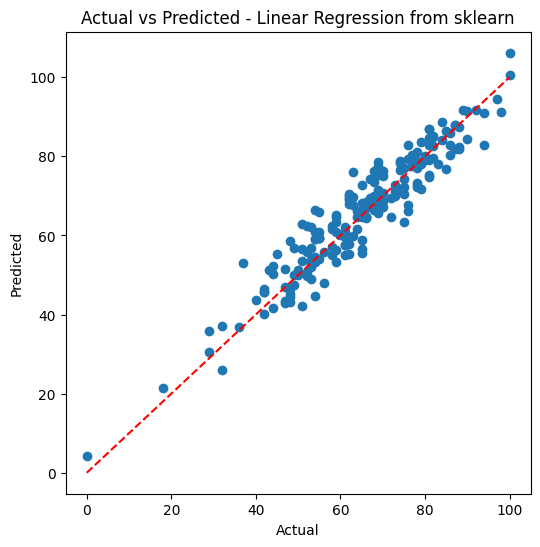

In [43]:
#Plotting
plt.figure(figsize=(6,6))
plt.scatter(Y_test, Y_pred_sklearn)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color='red', linestyle='--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted - Linear Regression from sklearn")
plt.show()


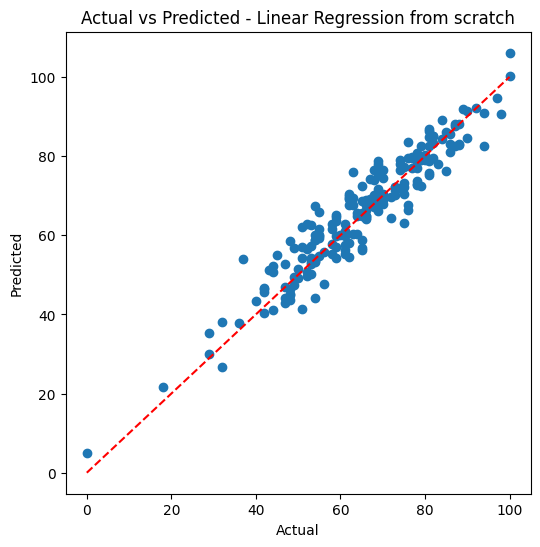

In [44]:
#Plotting
plt.figure(figsize=(6,6))
plt.scatter(Y_test, Y_pred_scratch)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color='red', linestyle='--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted - Linear Regression from scratch")
plt.show()
